# [Chapter 10] 계절형 자기회귀이동평균모형

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

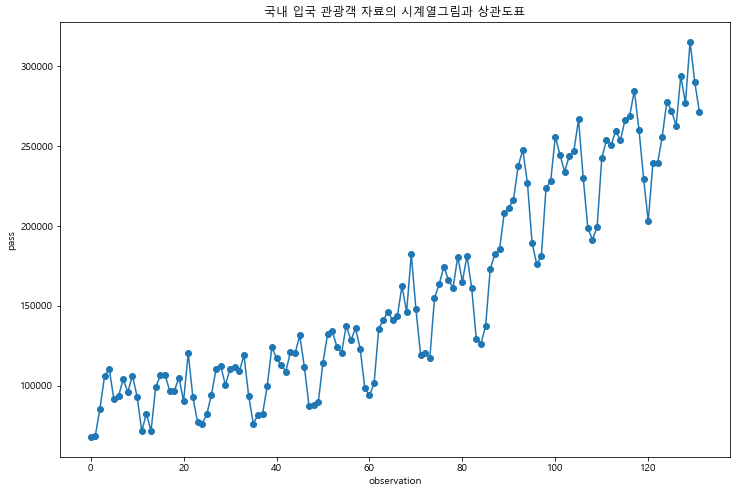

In [3]:
#==================================================
#P.383 10.2예제 ; 예 10-5 승법계절 ARIMA모형의 적합 예제
#==================================================

#그림 10-7 국내 입국 관광객 자료의 시계열그림과 상관도표
data = pd.read_csv("C:/Users/DongMin/Desktop/시계열분석/제5판_시계열분석_프로그램/제5판 시계열분석 data/tourist.txt", sep=' ',
                        names=list(range(12)),skipinitialspace=True)

raw_data= np.array(data).flatten()
raw_data = raw_data[~np.isnan(raw_data)]

plt.figure(figsize=(12,8))
plt.plot(raw_data,marker='o')
plt.title('국내 입국 관광객 자료의 시계열그림과 상관도표')
plt.xlabel('observation')
plt.ylabel('pass')
plt.show()

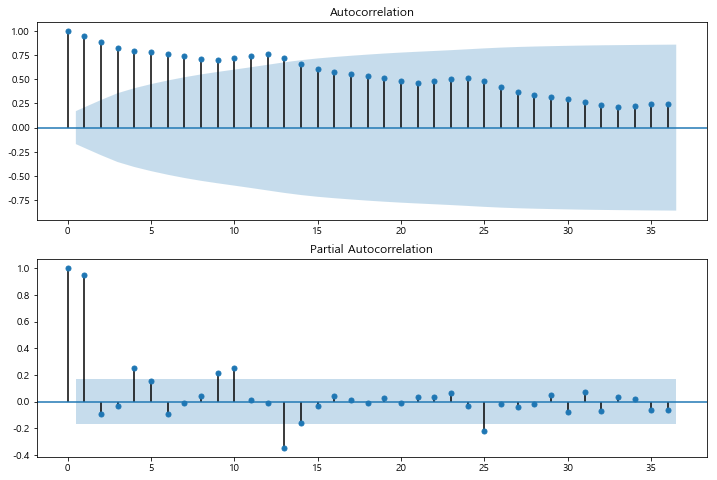

In [4]:
#10-7 국내 입국 관광객 자료의 acf, pacf
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(raw_data,lags=36,ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(raw_data,lags=36,ax=ax2,method='ywmle')

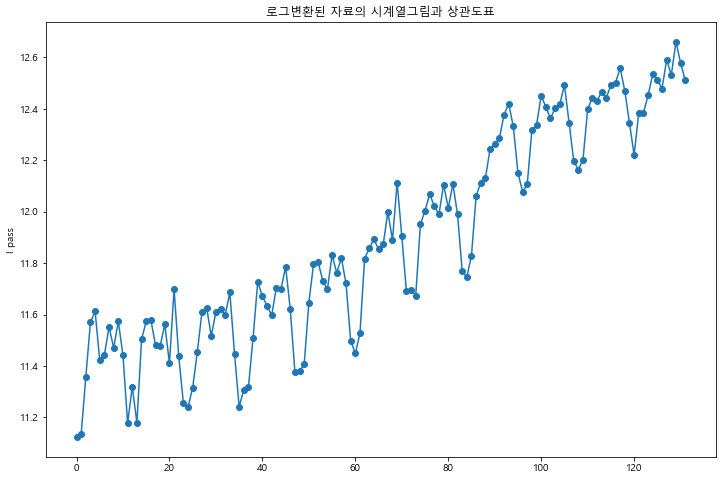

In [5]:
#그림 10-9 로그변환된 자료의 시계열그림과 상관도표

data = pd.read_csv("C:/Users/DongMin/Desktop/시계열분석/제5판_시계열분석_프로그램/제5판 시계열분석 data/tourist.txt", sep=' ',
                        names=list(range(12)),skipinitialspace=True)
ln_data=np.log(data)
raw_ln_data= np.array(ln_data).flatten()
raw_ln_data = raw_ln_data[~np.isnan(raw_ln_data)]

plt.figure(figsize=(12,8))
plt.plot(raw_ln_data,marker='o')
plt.title('로그변환된 자료의 시계열그림과 상관도표')
plt.ylabel('l pass')
plt.show()

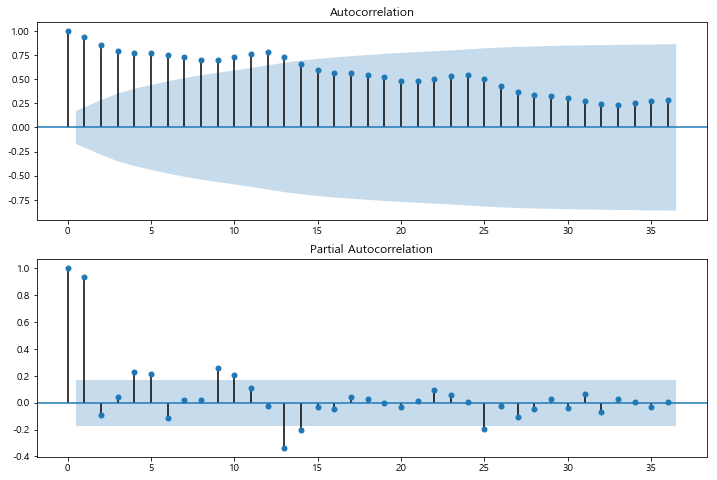

In [6]:
#로그변환된 자료의 acf, pacf
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(raw_ln_data,lags=36,ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(raw_ln_data,lags=36,ax=ax2,method='ywmle')

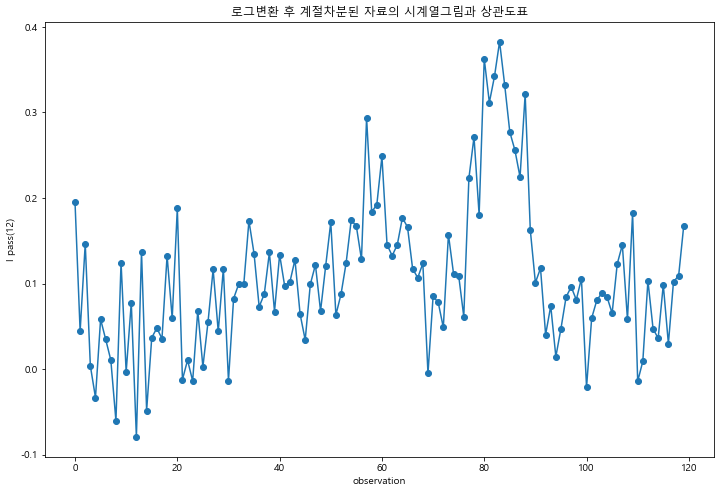

In [7]:
#그림 10-9 로그변환 후 계절차분된 자료의 시계열그림과 상관도표

data = pd.read_csv("C:/Users/DongMin/Desktop/시계열분석/제5판_시계열분석_프로그램/제5판 시계열분석 data/tourist.txt", sep=' ',
                        names=list(range(12)),skipinitialspace=True)
ln_data=np.log(data)
raw_ln_data= np.array(raw_ln_data).flatten()
raw_ln_data = raw_ln_data[~np.isnan(raw_ln_data)]
diff_data12=diff(raw_ln_data, k_diff=0, k_seasonal_diff=1, seasonal_periods=12)

plt.figure(figsize=(12,8))
plt.plot(diff_data12,marker='o')
plt.title('로그변환 후 계절차분된 자료의 시계열그림과 상관도표')
plt.xlabel('observation')
plt.ylabel('l pass(12)')
plt.show()

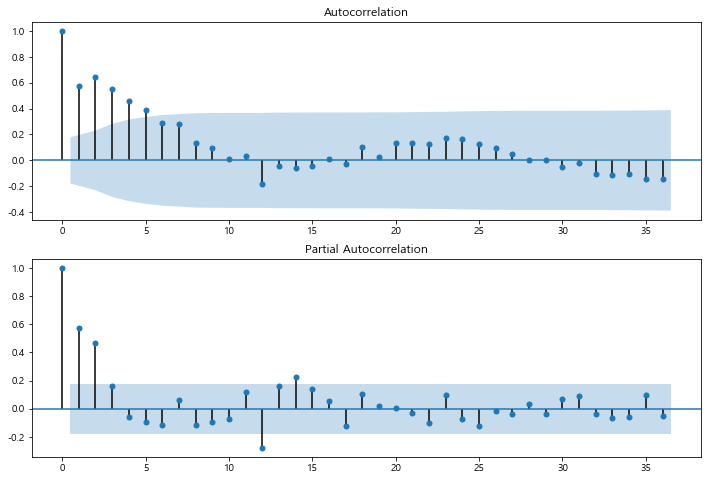

In [8]:
#그림10-9 로그변환 후 계절차분된 자료의 acf, pacf
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(diff_data12,lags=36,ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(diff_data12,lags=36,ax=ax2,method='ywmle')

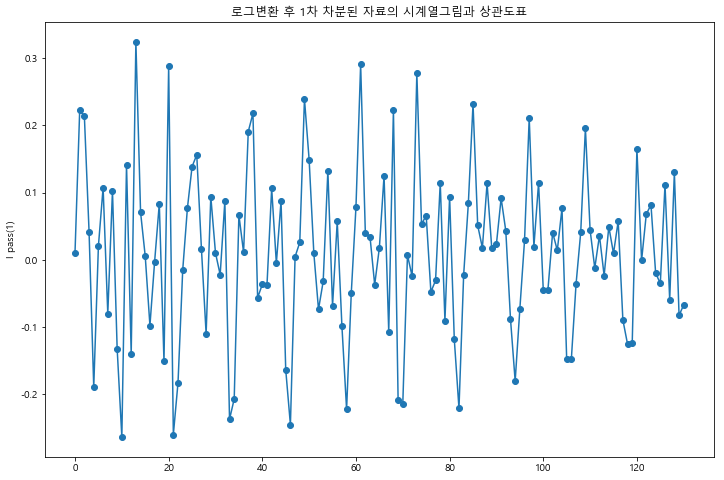

In [9]:
#그림10-10 로그변환 후 1차 차분된 자료의 시계열그림과 상관도표

data = pd.read_csv("C:/Users/DongMin/Desktop/시계열분석/제5판_시계열분석_프로그램/제5판 시계열분석 data/tourist.txt", sep=' ',
                        names=list(range(12)),skipinitialspace=True)
ln_data=np.log(data)
raw_ln_data= np.array(ln_data).flatten()
raw_ln_data = raw_ln_data[~np.isnan(raw_ln_data)]
diff_data=diff(raw_ln_data, k_diff=1, k_seasonal_diff=None, seasonal_periods=0)

plt.figure(figsize=(12,8))
plt.plot(diff_data,marker='o')
plt.title('로그변환 후 1차 차분된 자료의 시계열그림과 상관도표')
plt.ylabel('l pass(1)')
plt.show()

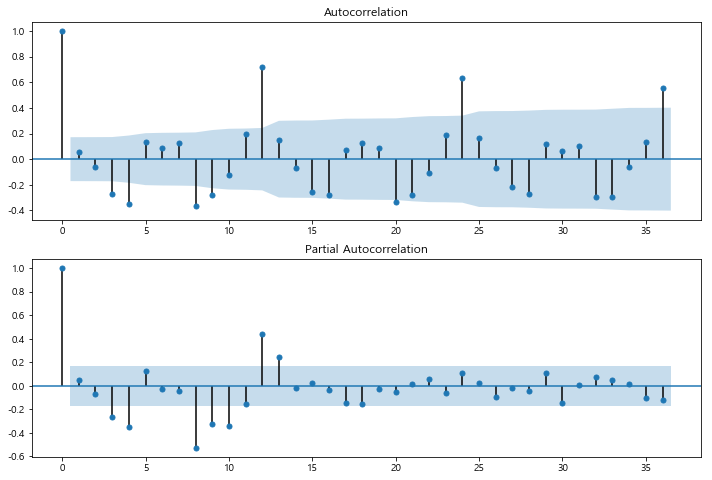

In [10]:
#그림10-10 로그변환 후 1차 차분된 자료의 acf, pacf ; ywunbiased(Default)를 위해 yuler-walker method 사용
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(diff_data,lags=36,ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(diff_data,lags=36,ax=ax2,method='ywmle')

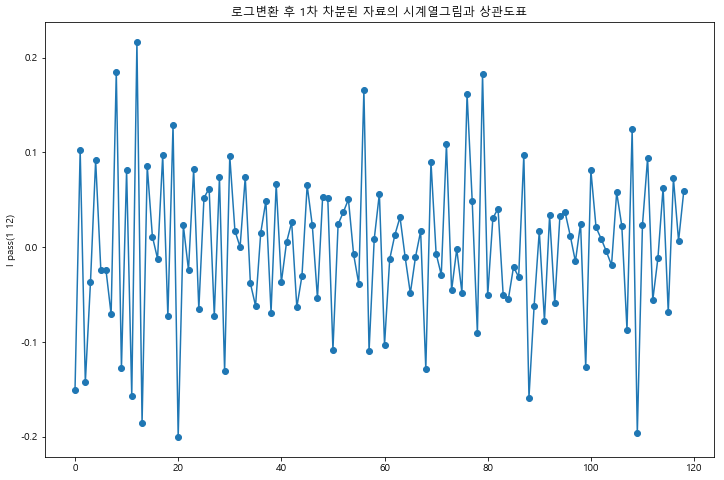

In [11]:
#그림10-11 로그변환 후 계절차분 및 1차 차분된 자료의 시계열그림과 상관도표

data = pd.read_csv("C:/Users/DongMin/Desktop/시계열분석/제5판_시계열분석_프로그램/제5판 시계열분석 data/tourist.txt", sep=' ',
                        names=list(range(12)),skipinitialspace=True)
ln_data=np.log(data)
raw_ln_data= np.array(ln_data).flatten()
raw_ln_data = raw_ln_data[~np.isnan(raw_ln_data)]
diff_data112=diff(raw_ln_data, k_diff=1, k_seasonal_diff=1, seasonal_periods=12)

plt.figure(figsize=(12,8))
plt.plot(diff_data112,marker='o')
plt.title('로그변환 후 1차 차분된 자료의 시계열그림과 상관도표')
plt.ylabel('l pass(1 12)')
plt.show()

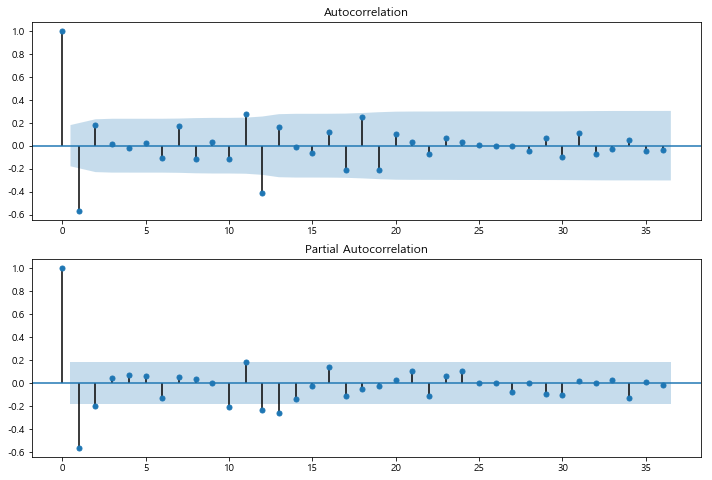

In [12]:
#그림10-11 로그변환 후 계절차분 및 1차 차분된 자료의 acf, pacf
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(diff_data112,lags=36,ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(diff_data112,lags=36,ax=ax2,method='ywmle')

In [74]:
model1=ARIMA(raw_ln_data,order=(0,1,1),seasonal_order=(0,1,1,12))
fit1=model1.fit(method='statespace')
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  132
Model:             ARIMA(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 169.069
Date:                          Fri, 06 Mar 2020   AIC                           -332.138
Time:                                  14:06:48   BIC                           -323.800
Sample:                                       0   HQIC                          -328.752
                                          - 132                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5801      0.077     -7.550      0.000      -0.731      -0.429
ma.S.L12      -0.5526      0.103     -5.369      0.000      -0.754      -0.351
sigma2         0.0033      0.000      7.990      0.000       0.002       0.004
===================================================================================
Ljung-Box (Q):                       33.60   Jarque-Bera (JB):                 1.64
Prob(Q):                              0.75   Prob(JB):                         0.44
Heteroskedasticity (H):               1.07   Skew:                             0.28
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
#fitting한 잔차들의 자기상관을 구한 결과값이 이상하게 산출됨 ; fitting 된 값은 유사한 값이 나오는데 잔차들의 자기상관이 확연히 다르게 나옴
resid_acf = sm.tsa.acf(fit1.resid, nlags=24)
resid_acf

C:\Users\DongMin\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.00000000e+00,  1.70438600e-02,  2.13611795e-02,  1.81242246e-02,
        1.11848460e-02, -1.63821815e-02,  2.59804669e-03,  1.71141481e-02,
       -3.28685370e-03, -3.80864710e-03, -1.46827188e-02, -1.97763050e-02,
       -3.88378511e-01, -1.53185544e-02,  5.35044583e-03, -8.34048039e-03,
       -7.31036308e-03,  6.68807310e-04, -3.77313703e-03, -1.58526167e-03,
       -9.69335145e-03,  1.21435983e-02, -1.51174080e-03,  5.32266269e-03,
       -7.32571887e-03])

In [76]:
sm.stats.acorr_ljungbox(fit1.resid, 
                        lags=[6,12,18,24],return_df=True)

,lb_stat,lb_pvalue
6,0.201962,0.999841
12,22.568965,0.031616
18,22.629078,0.205249
24,22.681564,0.538655


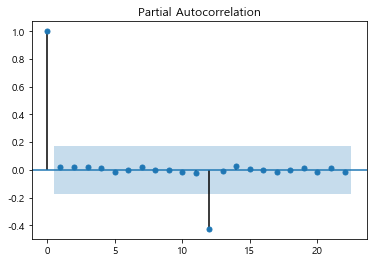

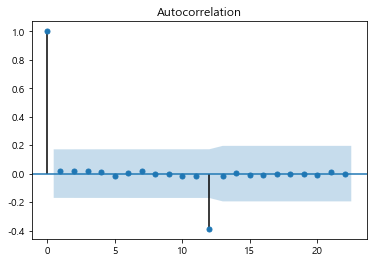

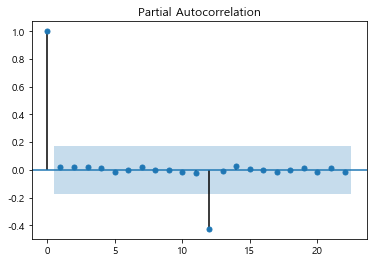

In [78]:
plot_acf(fit1.resid)
plot_pacf(fit1.resid)

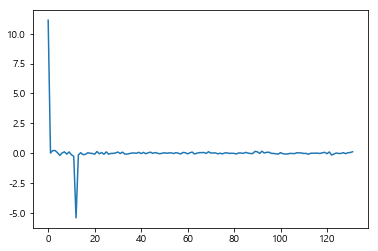

In [71]:
plt.plot(fit1.resid)